In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [48]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")


x_train = [1. 2.]
y_train = [300. 500.]


- Numpy arrays have a .shape parameter. x_train.shape returns a python tuple with an entry for each dimension.


In [49]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [50]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`


In [51]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Plotting the data


You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.

- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display


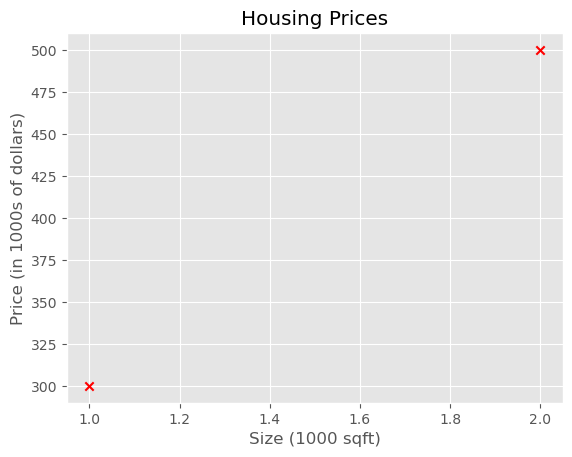

In [52]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [53]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


### The **model** in this case refers to the **linear function** that we are using to predict house prices based on the size of the house. This function is represented as:

f_wb = w \* x + b

Where:

- \( x \) is the size of the house (in 1000 sqft),
- \( w \) is the **weight** (also called the **slope**) that determines how much the price increases with each additional square foot,
- \( b \) is the **bias** (also called the **intercept**) that represents the base price of a house.

The model’s goal is to predict the price of a house given its size.

### For Example:

- If you know the size of a house (let's say 3.0 for 3000 sqft), you can plug that into the model to predict the price:

  \[
  f\_{w,b}(3.0) = w \cdot 3.0 + b
  \]

  Given the model parameters:

  - \( w = 200 \) (price per 1000 sqft),
  - \( b = 100 \) (base price),

  We can calculate the predicted price for 3000 sqft (3.0):

  \[
  f\_{w,b}(3.0) = 200 \cdot 3.0 + 100 = 600 + 100 = 700 \text{ (1000s of dollars)} = 700,000 \text{ dollars}
  \]


In [54]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

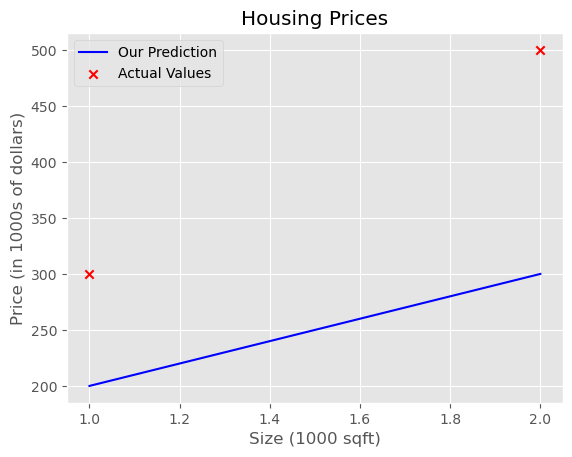

In [55]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [56]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


---
---

---

### The Linear Regression Model

The **linear regression model** is used to predict the price of a house based on its size. The relationship between house size (in 1000 sqft) and price (in 1000s of dollars) is assumed to be **linear**, meaning it can be represented by a straight line:

\[
f\_{w,b}(x) = w \cdot x + b
\]

Where:

- \( x \) is the input (house size in 1000 sqft),
- \( w \) is the **slope** (also called the **weight**), which determines how much the price increases for each additional unit of house size (1000 sqft),
- \( b \) is the **bias** (also called the **intercept**), which represents the price when the house size is zero (this is often seen as a base price in this context).

### Why Did We Choose \( w = 200 \) and \( b = 100 \)?

- **Slope \( w = 200 \)**:
  The slope of 200 indicates that for every additional 1000 sqft of house size, the price increases by 200,000 dollars. This is a simple assumption based on the training data you provided. Essentially, for each additional 1000 sqft, the house price is estimated to increase by $200,000. In real-world cases, this value can be determined through training (using a method like gradient descent or least squares).

  **For example**:

  - If a house is 2000 sqft (2.0), the price would be:
    \[
    f\_{w,b}(2.0) = 200 \cdot 2.0 + 100 = 400 + 100 = 500 \text{ (1000s of dollars)} = 500,000 \text{ dollars}
    \]
  - If a house is 3000 sqft (3.0), the price would be:
    \[
    f\_{w,b}(3.0) = 200 \cdot 3.0 + 100 = 600 + 100 = 700 \text{ (1000s of dollars)} = 700,000 \text{ dollars}
    \]

  So, the slope of 200 means that the model assumes that every additional 1000 sqft of house size increases the price by $200,000.

- **Bias \( b = 100 \)**:
  The bias of 100 represents the base price for a house when the size is zero (in 1000 sqft units). In this model, it means that the house price starts at $100,000 (this is just an initial value for the sake of the model). In reality, this might not make perfect sense for house prices, but it serves as a starting point for the linear model.

  **For example**:

  - For a house with 0 sqft (hypothetically), the price would be:
    \[
    f\_{w,b}(0) = 200 \cdot 0 + 100 = 100 \text{ (1000s of dollars)} = 100,000 \text{ dollars}
    \]

  This bias value doesn't necessarily reflect the real price of a house with zero square footage, but it's used to adjust the starting point of the model.

### Graphical Representation

To better understand this, we can plot the training data points along with the linear model. Here's how you can visualize it:

```python
import numpy as np
import matplotlib.pyplot as plt

# Larger dataset: sizes of houses (in 1000 sqft) and corresponding prices (in 1000s of dollars)
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # House sizes (1000 sqft)
y_train = np.array([300.0, 500.0, 700.0, 900.0, 1100.0])  # Prices (1000s of dollars)

# Define the model function
def model(w, b, x):
    """
    Compute the linear model output: f_wb = w * x + b
    """
    return w * x + b

# Set parameters (slope = 200, bias = 100)
w = 200  # Slope
b = 100  # Bias

# Generate predicted values using the model
y_pred = model(w, b, x_train)

# Plot the data points and the model's line
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='red', label='Training Data')  # Actual data points
plt.plot(x_train, y_pred, color='blue', label=f'Model Line (w={w}, b={b})')  # Model line

# Add labels, title, and legend
plt.xlabel("Size of house (1000 sqft)")
plt.ylabel("Price (1000s of dollars)")
plt.title("Housing Price Prediction with Linear Regression")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
```

### Expected Graphical Output:

1. **Red dots**: These represent the actual data points (training data). For example, a house with 1000 sqft sold for $300,000, and a house with 2000 sqft sold for $500,000.
2. **Blue line**: This is the model's prediction based on the formula \( f\_{w,b}(x) = w \cdot x + b \). It shows the trend predicted by the model for house sizes and their corresponding prices.

The slope of **200** causes the line to increase steeply (indicating that the price grows quickly as the size of the house increases), and the bias of **100** shifts the line upward, giving a base price of $100,000 when the house size is 0.

### Why These Values?

- **Slope (200)**: Chosen because it roughly matches the increase in price for each additional 1000 sqft in the data you provided. A steeper slope means the price increases more quickly with size.
- **Bias (100)**: Chosen as a starting point to make the line intersect the price axis at $100,000 when the size is 0.

### Conclusion:

- **Slope**: Controls how quickly the price changes with respect to house size.
- **Bias**: Sets the starting price (intercept) when the house size is zero.
- The graph allows us to see how well the model fits the data and helps us visualize the relationship between house size and price.


---
---

Saying that a house with zero square footage would have a price of $100,000 doesn't make sense in a real-world context, because a house with no size should likely have a price of zero or some other value that reflects a base cost, but not $100,000.

However, let me clarify the reasoning:

In the context of **linear regression**, the bias term (often called the intercept) can be any value, and it doesn't always correspond to a literal interpretation of the real world. It is part of the equation that ensures the line fits the data points in the best possible way according to the model.

### Revising the Model

Let's revisit the original problem:

- You have two data points:
  - 1,000 sqft house sold for $300,000.
  - 2,000 sqft house sold for $500,000.

We want to fit a linear regression model to this data. The model is represented as:

\[
f\_{w,b}(x) = w \cdot x + b
\]

Where:

- \( w \) is the **slope** (rate of price change per 1000 sqft),
- \( b \) is the **bias** (the price intercept when the size is 0 sqft, not necessarily meaningful but a part of the model for the sake of fitting data).

Given the two points:

1. When \( x = 1 \) (1,000 sqft), \( y = 300 \) (price = 300,000 dollars),
2. When \( x = 2 \) (2,000 sqft), \( y = 500 \) (price = 500,000 dollars).

We can **calculate the slope** \( w \) as follows:

\[
w = \frac{y_2 - y_1}{x_2 - x_1} = \frac{500 - 300}{2 - 1} = 200
\]

So, the slope \( w = 200 \), which means the price increases by $200,000 for every additional 1,000 sqft.

Next, we calculate the **bias** \( b \). Using the equation of the line and one of the data points, say \( (x_1, y_1) = (1, 300) \):

\[
y_1 = w \cdot x_1 + b
\]

Substituting known values:

\[
300 = 200 \cdot 1 + b
\]

Solving for \( b \):

\[
b = 300 - 200 = 100
\]

So, the bias \( b = 100 \).

Now, the final model is:

\[
f\_{w,b}(x) = 200 \cdot x + 100
\]

### Why 100 as the Bias?

The bias (100) in this case means that the model is **adjusted** so that the price line fits the two data points. While the literal interpretation of a house with 0 sqft being worth $100,000 doesn't make sense, this value is simply a **model parameter** that helps the line fit the data.

### Graphical Representation

Let me show how the line looks based on this model, and how it fits the two data points.

```python
import numpy as np
import matplotlib.pyplot as plt

# Data points: Size (in 1000 sqft) and Price (in 1000s of dollars)
x_train = np.array([1.0, 2.0])  # House sizes (1000 sqft)
y_train = np.array([300.0, 500.0])  # Prices (1000s of dollars)

# Define the model function with slope (w) and bias (b)
def model(w, b, x):
    """
    Compute the linear model output: f_wb = w * x + b
    """
    return w * x + b

# Parameters for the model
w = 200  # Slope (price increase per 1000 sqft)
b = 100  # Bias (adjustment to the price)

# Generate predicted values using the model
y_pred = model(w, b, x_train)

# Plot the data points and the model's line
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='red', label='Training Data')  # Actual data points
plt.plot(x_train, y_pred, color='blue', label=f'Model Line: f(x) = 200x + 100')  # Model line

# Add labels, title, and legend
plt.xlabel("Size of house (1000 sqft)")
plt.ylabel("Price (1000s of dollars)")
plt.title("Housing Price Prediction with Linear Regression")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
```

### Graph Interpretation

- The **red dots** represent the actual data points: one for 1,000 sqft at $300,000 and another for 2,000 sqft at $500,000.
- The **blue line** represents the model's predicted prices based on the equation \( f\_{w,b}(x) = 200 \cdot x + 100 \). It shows a straight line passing through the points, representing how the price increases with the house size.

### Why 100K Bias Is Just a Model Parameter

The bias value of **100** does not reflect the literal cost of a 0 sqft house. It is simply a parameter that helps the line fit the data as best as possible. In practice, this might not have any real-world significance but ensures the model captures the underlying trend of the data. The bias term ensures the line does not pass through the origin (0,0), which might not fit the data well.


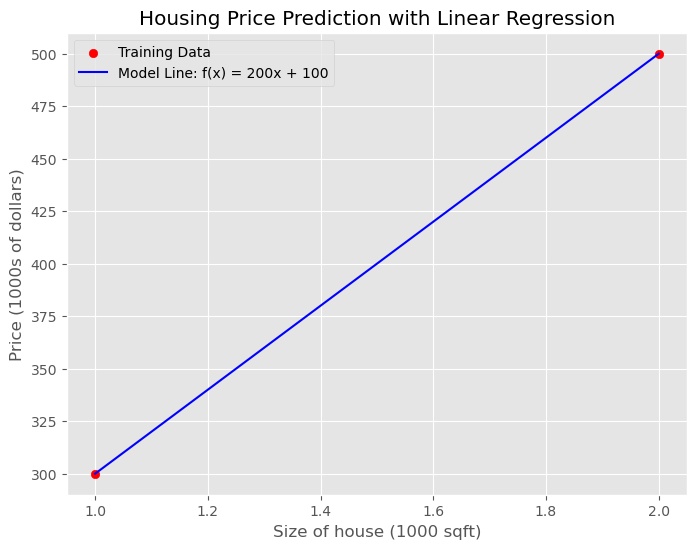

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Data points: Size (in 1000 sqft) and Price (in 1000s of dollars)
x_train = np.array([1.0, 2.0])  # House sizes (1000 sqft)
y_train = np.array([300.0, 500.0])  # Prices (1000s of dollars)

# Define the model function with slope (w) and bias (b)
def model(w, b, x):
    """
    Compute the linear model output: f_wb = w * x + b
    """
    return w * x + b

# Parameters for the model
w = 200  # Slope (price increase per 1000 sqft)
b = 100  # Bias (adjustment to the price)

# Generate predicted values using the model
y_pred = model(w, b, x_train)

# Plot the data points and the model's line
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='red', label='Training Data')  # Actual data points
plt.plot(x_train, y_pred, color='blue', label=f'Model Line: f(x) = 200x + 100')  # Model line

# Add labels, title, and legend
plt.xlabel("Size of house (1000 sqft)")
plt.ylabel("Price (1000s of dollars)")
plt.title("Housing Price Prediction with Linear Regression")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
